## Project 2: Predicting House Price (Ames Dataset)

### Problem statement:
It is quite troublesome to predict a correct price for a certain house value with the huge amount of features from the house. 
It would be better if there is a way to focus on a few features maybe at most 3 important features that can predict the house price.

### Objectives:
1. Create a model that have a high probability of predicting correctly the house value based on features with high coefficient.
2. List down 3 most important features that have a great effect on the value of a house.



### Steps:

1. EDA
2. Data Cleaning
3. Feature Selection & Engineering
4. Modelling & Evaluation
5. Conclusion & Summary


# EDA

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Import the data
df_s = pd.read_csv('./datasets/sample_sub_reg.csv',  keep_default_na=False, na_values="") 
df_test = pd.read_csv('./datasets/test.csv',  keep_default_na=False, na_values="")
df_train = pd.read_csv('./datasets/train.csv', keep_default_na=False, na_values="")
# keep_default_na=False, na_values="". Helps to reduce the number of nulls

In [3]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NA,Reg,Lvl,...,0,0,0,NA,NA,NA,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NA,IR1,Lvl,...,0,185,0,NA,NA,NA,0,7,2009,WD


In [4]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [5]:
# sum of missing values
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)
df_train.isna().sum().sort_values(ascending=False)

Lot Frontage       330
Garage Yr Blt      114
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Exposure        4
BsmtFin Type 2       2
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Cond          1
Bsmt Qual            1
Garage Finish        1
Garage Cars          1
Garage Area          1
Garage Qual          1
Total Bsmt SF        1
BsmtFin Type 1       1
Bsmt Cond            1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Kitchen AbvGr        0
Id                   0
Fireplaces           0
Fireplace Qu         0
Sale Type            0
Yr Sold              0
Mo Sold              0
Misc Val             0
Misc Feature         0
Fence                0
Pool QC              0
Pool Area            0
Screen Porch         0
3Ssn Porch           0
Enclosed Porch       0
Open Porch SF        0
Wood Deck SF         0
Paved Drive

In [6]:
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)
df_test.isnull().sum().sort_values(ascending=False)

Lot Frontage       160
Garage Yr Blt       45
Garage Finish        1
Mas Vnr Area         1
Mas Vnr Type         1
Electrical           1
Misc Feature         0
Half Bath            0
Mo Sold              0
Yr Sold              0
TotRms AbvGrd        0
Kitchen Qual         0
Kitchen AbvGr        0
Bedroom AbvGr        0
Full Bath            0
Fireplaces           0
Bsmt Half Bath       0
Bsmt Full Bath       0
Gr Liv Area          0
Low Qual Fin SF      0
2nd Flr SF           0
1st Flr SF           0
Functional           0
Fireplace Qu         0
Fence                0
Wood Deck SF         0
Pool QC              0
Pool Area            0
Screen Porch         0
3Ssn Porch           0
Enclosed Porch       0
Open Porch SF        0
Paved Drive          0
Garage Type          0
Garage Cond          0
Garage Qual          0
Garage Area          0
Garage Cars          0
Central Air          0
Misc Val             0
Id                   0
Heating              0
Heating QC           0
Lot Config 

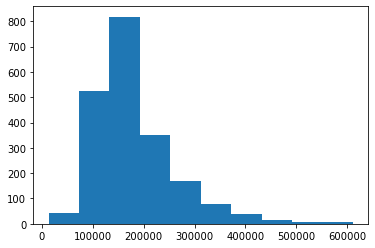

In [7]:
# Look at the distribution for saleprice

plt.hist(df_train.SalePrice); # it is not normally distributed

In [8]:
# look at the correlation

# Find the top features correlation to saleprice
df_train_corr = df_train.corr()
#Correlation with output variable
cor_target = abs(df_train_corr['SalePrice'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5].sort_values(ascending=False)
print(f'Features with more than 0.5 correlation to SalePrice: ')
print('--------------------------')
print(relevant_features)

Features with more than 0.5 correlation to SalePrice: 
--------------------------
SalePrice         1.000000
Overall Qual      0.800207
Gr Liv Area       0.697038
Garage Area       0.650270
Garage Cars       0.648220
Total Bsmt SF     0.628925
1st Flr SF        0.618486
Year Built        0.571849
Year Remod/Add    0.550370
Full Bath         0.537969
Garage Yr Blt     0.533922
Mas Vnr Area      0.512230
TotRms AbvGrd     0.504014
Name: SalePrice, dtype: float64


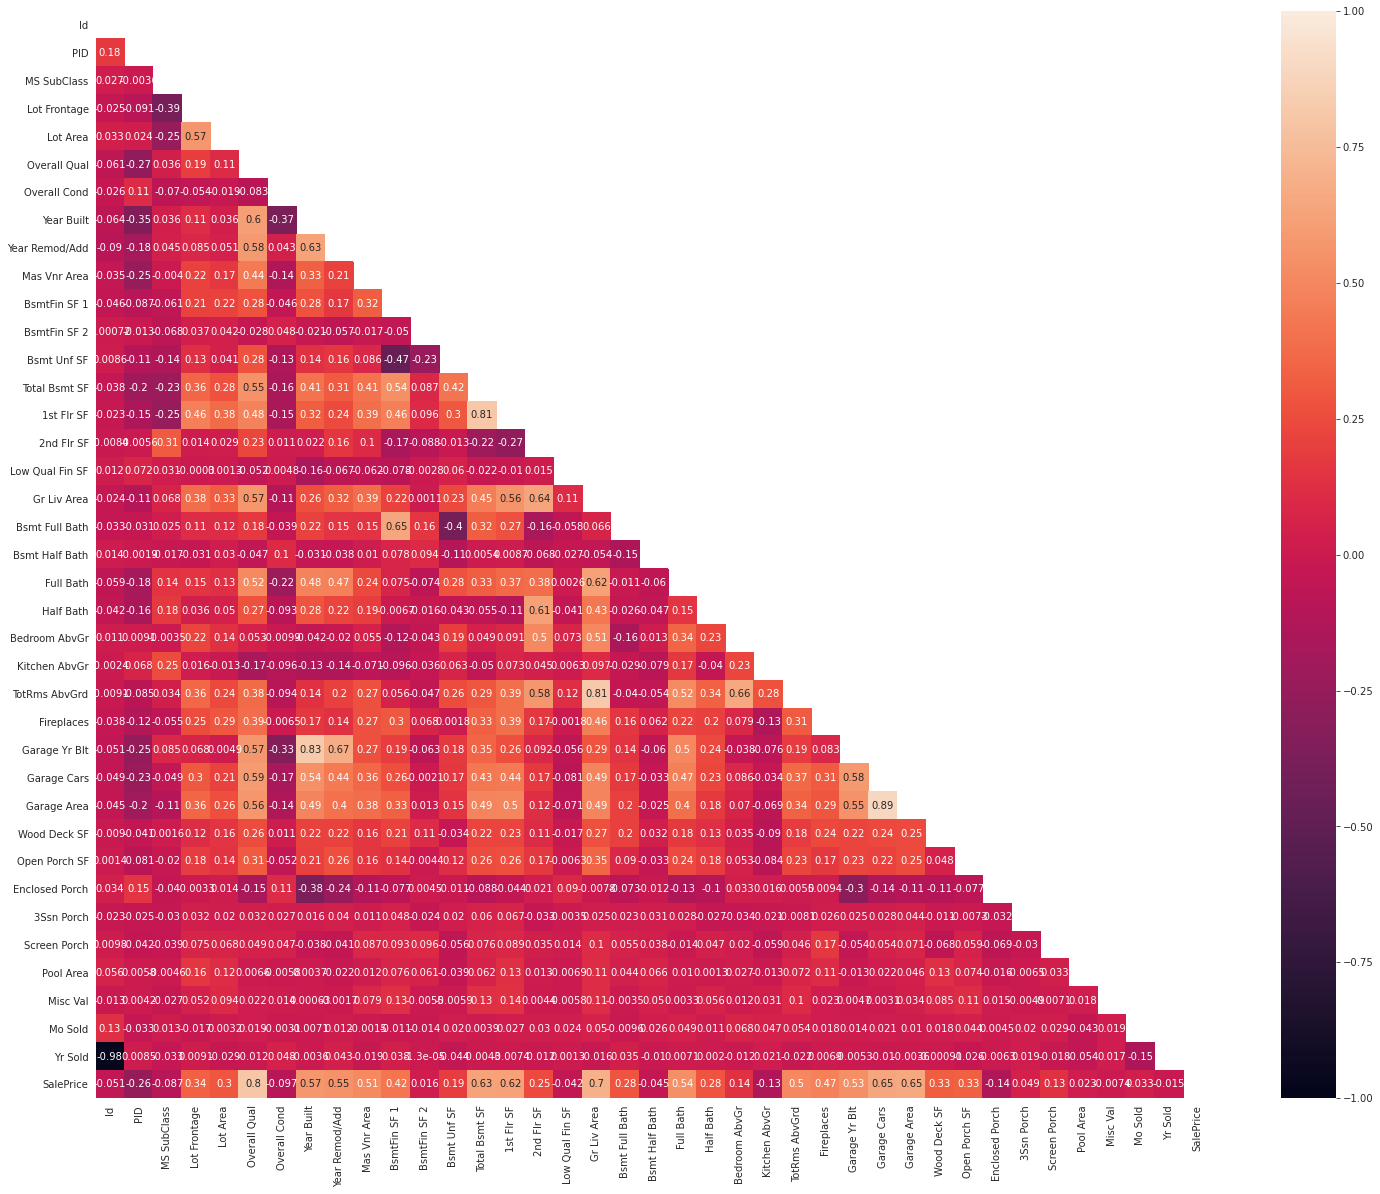

In [9]:
# Visualize the correlation
mask = np.zeros_like(df_train_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 20))
    ax = sns.heatmap(df_train_corr, mask=mask, vmin=-1, vmax=1, annot=True)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [11]:
df_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [12]:
#sns.pairplot(data=df_train, kind='scatter');

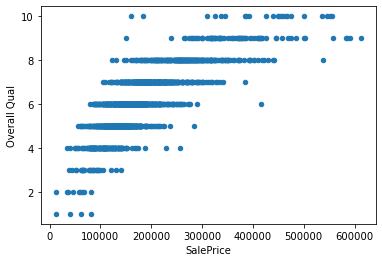

In [13]:
# find the outliers

df_train.plot(kind='scatter', x='SalePrice', y='Overall Qual', alpha=1);

In [14]:
df_train[df_train['Overall Qual']>9].sort_values(by='SalePrice')

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NA,NA,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NA,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NA,NA,Elev,17000,10,2007,New,183850
201,524,528477050,60,FV,85.0,11003,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,10,5,2008,2008,Gable,CompShg,VinylSd,VinylSd,Stone,160.0,Ex,TA,PConc,Ex,TA,Av,GLQ,765.0,Unf,0.0,252.0,1017.0,GasA,Ex,Y,SBrkr,1026,981,0,2007,1.0,0.0,2,1,3,1,Ex,10,Typ,1,Ex,Attchd,2008.0,Fin,3.0,812.0,TA,TA,Y,168,52,0,0,0,0,NA,NA,NA,0,4,2009,WD,310000
1141,1321,902401120,75,RM,75.0,13500,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,PosA,1Fam,2.5Unf,10,9,1893,2000,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Ex,Ex,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,1237.0,1237.0,GasA,Gd,Y,SBrkr,1521,1254,0,2775,0.0,0.0,3,1,3,1,Gd,9,Typ,1,Gd,Detchd,1988.0,Unf,2.0,880.0,Gd,TA,Y,105,502,0,0,0,0,NA,NA,NA,0,7,2008,WD,325000
622,421,528102040,20,RL,96.0,12456,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2007,Hip,CompShg,CemntBd,CmentBd,Stone,230.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1172.0,Unf,0.0,528.0,1700.0,GasA,Ex,Y,SBrkr,1718,0,0,1718,1.0,0.0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3.0,786.0,TA,TA,Y,216,48,0,0,0,0,NA,NA,NA,0,7,2009,WD,337500
519,1178,533236090,160,FV,36.0,3951,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,10,5,1998,1999,Gable,CompShg,BrkFace,MetalSd,None,0.0,Ex,TA,PConc,Gd,TA,Mn,BLQ,128.0,GLQ,842.0,0.0,970.0,GasA,Ex,Y,SBrkr,1469,924,0,2393,1.0,0.0,2,1,2,1,Ex,7,Typ,1,TA,Attchd,1998.0,Fin,2.0,846.0,TA,TA,Y,0,90,0,0,94,0,NA,NA,NA,0,2,2008,WD,345000
682,1053,528104050,20,RL,114.0,14803,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,BrkFace,816.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1636.0,Unf,0.0,442.0,2078.0,GasA,Ex,Y,SBrkr,2084,0,0,2084,1.0,0.0,2,0,2,1,Ex,7,Typ,1,Gd,Attchd,2007.0,Fin,3.0,1220.0,TA,TA,Y,188,45,0,0,0,0,NA,NA,NA,0,6,2008,New,385000
199,448,528166060,20,RL,103.0,13472,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,2003,Hip,CompShg,VinylSd,VinylSd,BrkFace,922.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,56.0,Unf,0.0,2336.0,2392.0,GasA,Ex,Y,SBrkr,2392,0,0,2392,0.0,0.0,2,0,3,1,Ex,8,Typ,1,Ex,Attchd,2003.0,Fin,3.0,968.0,TA,TA,Y,248,105,0,0,0,0,NA,NA,NA,0,6,2009,WD,386250
517,2276,921128030,20,RL,85.0,12633,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,Timber,PosA,PosA,1Fam,1Story,10,5,2006,2007,Hip,CompShg,MetalSd,MetalSd,BrkFace,242.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0.0,Unf,0.0,1824.0,1824.0,GasA,Ex,Y,SBrkr,1824,0,0,1824,0.0,0.0,2,0,3,1,Ex

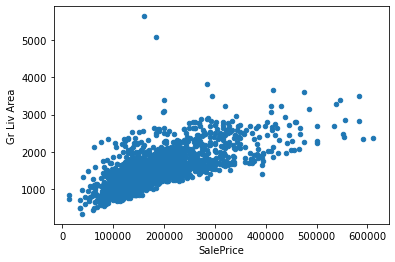

In [15]:
df_train.plot(kind='scatter', x='SalePrice', y='Gr Liv Area', alpha=1);

In [16]:
df_train[df_train['Gr Liv Area']>4000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NA,NA,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NA,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NA,NA,Elev,17000,10,2007,New,183850


In [17]:
# drop the outliers
outliers = df_train[((df_train.SalePrice ==160000) & (df_train.SalePrice == 183850))].index
df_train.drop(outliers, inplace=True)

### EDA Summary:

#### For the train dataset:
1. The distribution for the saleprice is not normal
2. The top 5 correlated features to saleprice are:
- Overall Qual = 0.800207
- Gr Liv Area = 0.697038
- Garage Area = 0.650270
- Garage Cars = 0.648220
- Total Bsmt SF = 0.628925
3. Columns with high amount of missing values:
- Lot Frontage = 330
- Garage Yr Blt = 114
- Mas Vnr Type = 22
- Mas Vnr Area = 22
4. The two outliers have Saleprice of 160000 and 183850.    
    
#### For the test dataset:
1. Columns with high amount of missing values:
- Lot Frontage = 160 
- Garage Yr Blt = 45

# Data Cleaning

In [18]:
# The column MS SubClass is not suppose to be treated as an int.

# Replace each values with the original data

old_vals = [20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190]
new_vals = ['1-STORY 1946 & NEWER ALL STYLES', '1-STORY 1945 & OLDER', '1-STORY W/FINISHED ATTIC ALL AGES', 
            '1-1/2 STORY - UNFINISHED ALL AGES', '1-1/2 STORY FINISHED ALL AGES', '2-STORY 1946 & NEWER',
            '2-STORY 1945 & OLDER', '2-1/2 STORY ALL AGES', 'SPLIT OR MULTI-LEVEL', 'SPLIT FOYER',
            'DUPLEX - ALL STYLES AND AGES', '1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 
            '1-1/2 STORY PUD - ALL AGES', '2-STORY PUD - 1946 & NEWER', 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 
            '2 FAMILY CONVERSION - ALL STYLES AND AGES']

df_train['MS SubClass'].replace({old_vals[0]: new_vals[0], old_vals[1]: new_vals[1], old_vals[2]: new_vals[2], 
                              old_vals[3]: new_vals[3], old_vals[4]: new_vals[4], old_vals[5]: new_vals[5],
                              old_vals[6]: new_vals[6], old_vals[7]: new_vals[7], old_vals[8]: new_vals[8], 
                              old_vals[9]: new_vals[9], old_vals[10]: new_vals[10], old_vals[11]: new_vals[11], 
                              old_vals[12]: new_vals[12], old_vals[13]: new_vals[13], old_vals[14]: new_vals[14], 
                              old_vals[15]: new_vals[15]}, 
                             inplace=True)
df_train['MS SubClass'].head(15)

0                        2-STORY 1946 & NEWER
1                        2-STORY 1946 & NEWER
2             1-STORY 1946 & NEWER ALL STYLES
3                        2-STORY 1946 & NEWER
4               1-1/2 STORY FINISHED ALL AGES
5             1-STORY 1946 & NEWER ALL STYLES
6     PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
7             1-STORY 1946 & NEWER ALL STYLES
8             1-STORY 1946 & NEWER ALL STYLES
9                        2-STORY 1946 & NEWER
10                 2-STORY PUD - 1946 & NEWER
11            1-STORY 1946 & NEWER ALL STYLES
12                       2-STORY 1945 & OLDER
13                 2-STORY PUD - 1946 & NEWER
14            1-STORY 1946 & NEWER ALL STYLES
Name: MS SubClass, dtype: object

In [19]:
# Convert Ordinal Variable to numerical

df_train['Lot Shape'].replace({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}, inplace=True)
df_train['Utilities'].replace({'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0}, inplace=True)
df_train['Land Slope'].replace({'Gtl': 2, 'Mod': 1, 'Sev': 0}, inplace=True)
df_train['Exter Qual'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2}, inplace=True)
df_train['Exter Cond'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2}, inplace=True)
df_train['Bsmt Qual'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2, 'NA': 0}, inplace=True)
df_train['Bsmt Cond'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2, 'NA': 0}, inplace=True)
df_train['Bsmt Exposure'].replace({'Gd': 4, 'Av': 3, 'Mn': 2,'No': 1,'NA': 0}, inplace=True)
df_train['BsmtFin Type 1'].replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}, inplace=True)
df_train['BsmtFin Type 2'].replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}, inplace=True)
df_train['Heating QC'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2}, inplace=True)
df_train['Electrical'].replace({'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0}, inplace=True)
df_train['Kitchen Qual'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2}, inplace=True)
df_train['Functional'].replace({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0}, inplace=True)
df_train['Fireplace Qu'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2, 'NA': 0}, inplace=True)
df_train['Garage Finish'].replace({'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}, inplace=True)
df_train['Garage Qual'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2, 'NA': 0}, inplace=True)
df_train['Garage Cond'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2, 'NA': 0}, inplace=True)
df_train['Paved Drive'].replace({'Y': 2, 'P': 1, 'N': 0}, inplace=True)
df_train['Pool QC'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'NA': 0}, inplace=True)
df_train['Fence'].replace({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}, inplace=True)
df_train['Garage Type'].replace({'2Types': 6, 'Attchd': 5, 'Basment': 4, 'BuiltIn': 3, 'CarPort': 2, 'Detchd': 1, 'NA': 0}, inplace=True)


df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,2-STORY 1946 & NEWER,RL,NaN,13517,Pave,NA,2,Lvl,3,CulDSac,2,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,7,5,CBlock,5.0,5.0,1.0,6.0,533.0,1.0,0.0,192.0,725.0,GasA,9,Y,4,725,754,0,1479,0.0,0.0,2,1,3,1,7,6,7,0,0,5,1976.0,2.0,2.0,475.0,5.0,5.0,2,0,44,0,0,0,0,0,0,NA,0,3,2010,WD,130500
1,544,531379050,2-STORY 1946 & NEWER,RL,43.0,11492,Pave,NA,2,Lvl,3,CulDSac,2,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,7,5,PConc,7.0,5.0,1.0,6.0,637.0,1.0,0.0,276.0,913.0,GasA,9,Y,4,913,1209,0,2122,1.0,0.0,2,1,4,1,7,8,7,1,5,5,1997.0,2.0,2.0,559.0,5.0,5.0,2,0,74,0,0,0,0,0,0,NA,0,4,2009,WD,220000
2,153,535304180,1-STORY 1946 & NEWER ALL STYLES,RL,68.0,7922,Pave,NA,3,Lvl,3,Inside,2,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,5,7,CBlock,5.0,5.0,1.0,6.0,731.0,1.0,0.0,326.0,1057.0,GasA,5,Y,4,1057,0,0,1057,1.0,0.0,1,0,3,1,7,5,7,0,0,1,1953.0,1.0,1.0,246.0,5.0,5.0,2,0,52,0,0,0,0,0,0,NA,0,1,2010,WD,109000
3,318,916386060,2-STORY 1946 & NEWER,RL,73.0,9802,Pave,NA,3,Lvl,3,Inside,2,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,5,5,PConc,7.0,5.0,1.0,1.0,0.0,1.0,0.0,384.0,384.0,GasA,7,Y,4,744,700,0,1444,0.0,0.0,2,1,3,1,5,7,7,0,0,3,2007.0,3.0,2.0,400.0,5.0,5.0,2,100,0,0,0,0,0,0,0,NA,0,4,2010,WD,174000
4,255,906425045,1-1/2 STORY FINISHED ALL AGES,RL,82.0,14235,Pave,NA,2,Lvl,3,Inside,2,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,5,5,PConc,3.0,7.0,1.0,1.0,0.0,1.0,0.0,676.0,676.0,GasA,5,Y,4,831,614,0,1445,0.0,0.0,2,0,3,1,5,6,7,0,0,1,1957.0,1.0,2.0,484.0,5.0,5.0,0,0,59,0,0,0,0,0,0,NA,0,3,2010,WD,138500


In [20]:
# Convert continuos values with null values to  0
df_train[['Mas Vnr Type','Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
     'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Type', 'Garage Yr Blt',
     'Garage Finish', 'Garage Qual', 'Garage Cond']] = df_train[['Mas Vnr Type','Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
     'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Type', 'Garage Yr Blt',
     'Garage Finish', 'Garage Qual', 'Garage Cond']].fillna(0)

In [21]:
# Convert nominal values with null values to  NA
df_train[['Mas Vnr Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'BsmtFin SF 2', 
       'Garage Area', 'BsmtFin SF 1', 'Garage Cars', 'Bsmt Unf SF', 
       'Total Bsmt SF']] = df_train[['Mas Vnr Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'BsmtFin SF 2', 
       'Garage Area', 'BsmtFin SF 1', 'Garage Cars', 'Bsmt Unf SF', 
       'Total Bsmt SF']].fillna('NaN')

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   object 
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   int64  
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   int64  
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   int64  
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

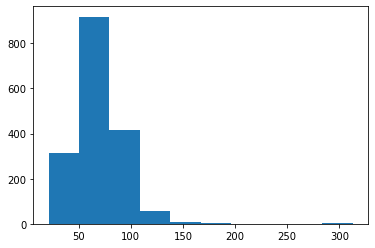

In [23]:
plt.hist(df_train['Lot Frontage']);
# Lot Frontage is positively skewed

In [24]:
# Impute missing values
from sklearn.impute import KNNImputer

In [25]:
# Instantiate model
knn_imp = KNNImputer()

In [26]:
# insert columns related to lot frontage 
train_missing = df_train[['Lot Frontage', 'Lot Shape', 'Lot Area']].copy()

In [27]:
train_missing.head()

,Lot Frontage,Lot Shape,Lot Area
0,NaN,2,13517
1,43.0,2,11492
2,68.0,3,7922
3,73.0,3,9802
4,82.0,2,14235


In [28]:
train_missing = knn_imp.fit_transform(train_missing)

train_missing = pd.DataFrame(train_missing, columns=('Lot Frontage', 'Lot Shape', 'Lot Area'))

In [29]:
# insert the imputed lot frontage column
df_train['Lot Frontage'] = train_missing['Lot Frontage']

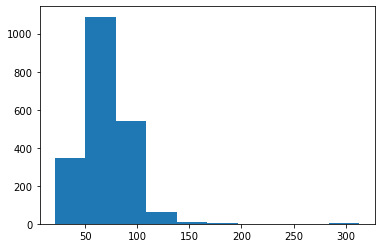

In [30]:
# check
plt.hist(train_missing['Lot Frontage']);

In [31]:
# copy dataset to new variable and drop 'lot frontage' column
train_clean = df_train.copy()

train_clean.drop(columns='Lot Frontage', inplace=True)

In [32]:
# find out the percentage of null values for each columns
def missing(x):
    i = round((x.isnull().sum() * 100/ len(x)),2).sort_values(ascending=False)
    df = pd.DataFrame(i)
    print(df.head(20))   


missing(train_clean)

                   0
Id               0.0
PID              0.0
Garage Type      0.0
Fireplace Qu     0.0
Fireplaces       0.0
Functional       0.0
TotRms AbvGrd    0.0
Kitchen Qual     0.0
Kitchen AbvGr    0.0
Bedroom AbvGr    0.0
Half Bath        0.0
Full Bath        0.0
Bsmt Half Bath   0.0
Bsmt Full Bath   0.0
Gr Liv Area      0.0
Low Qual Fin SF  0.0
2nd Flr SF       0.0
1st Flr SF       0.0
Electrical       0.0
Garage Yr Blt    0.0


# Feature Selection & Engineering

''

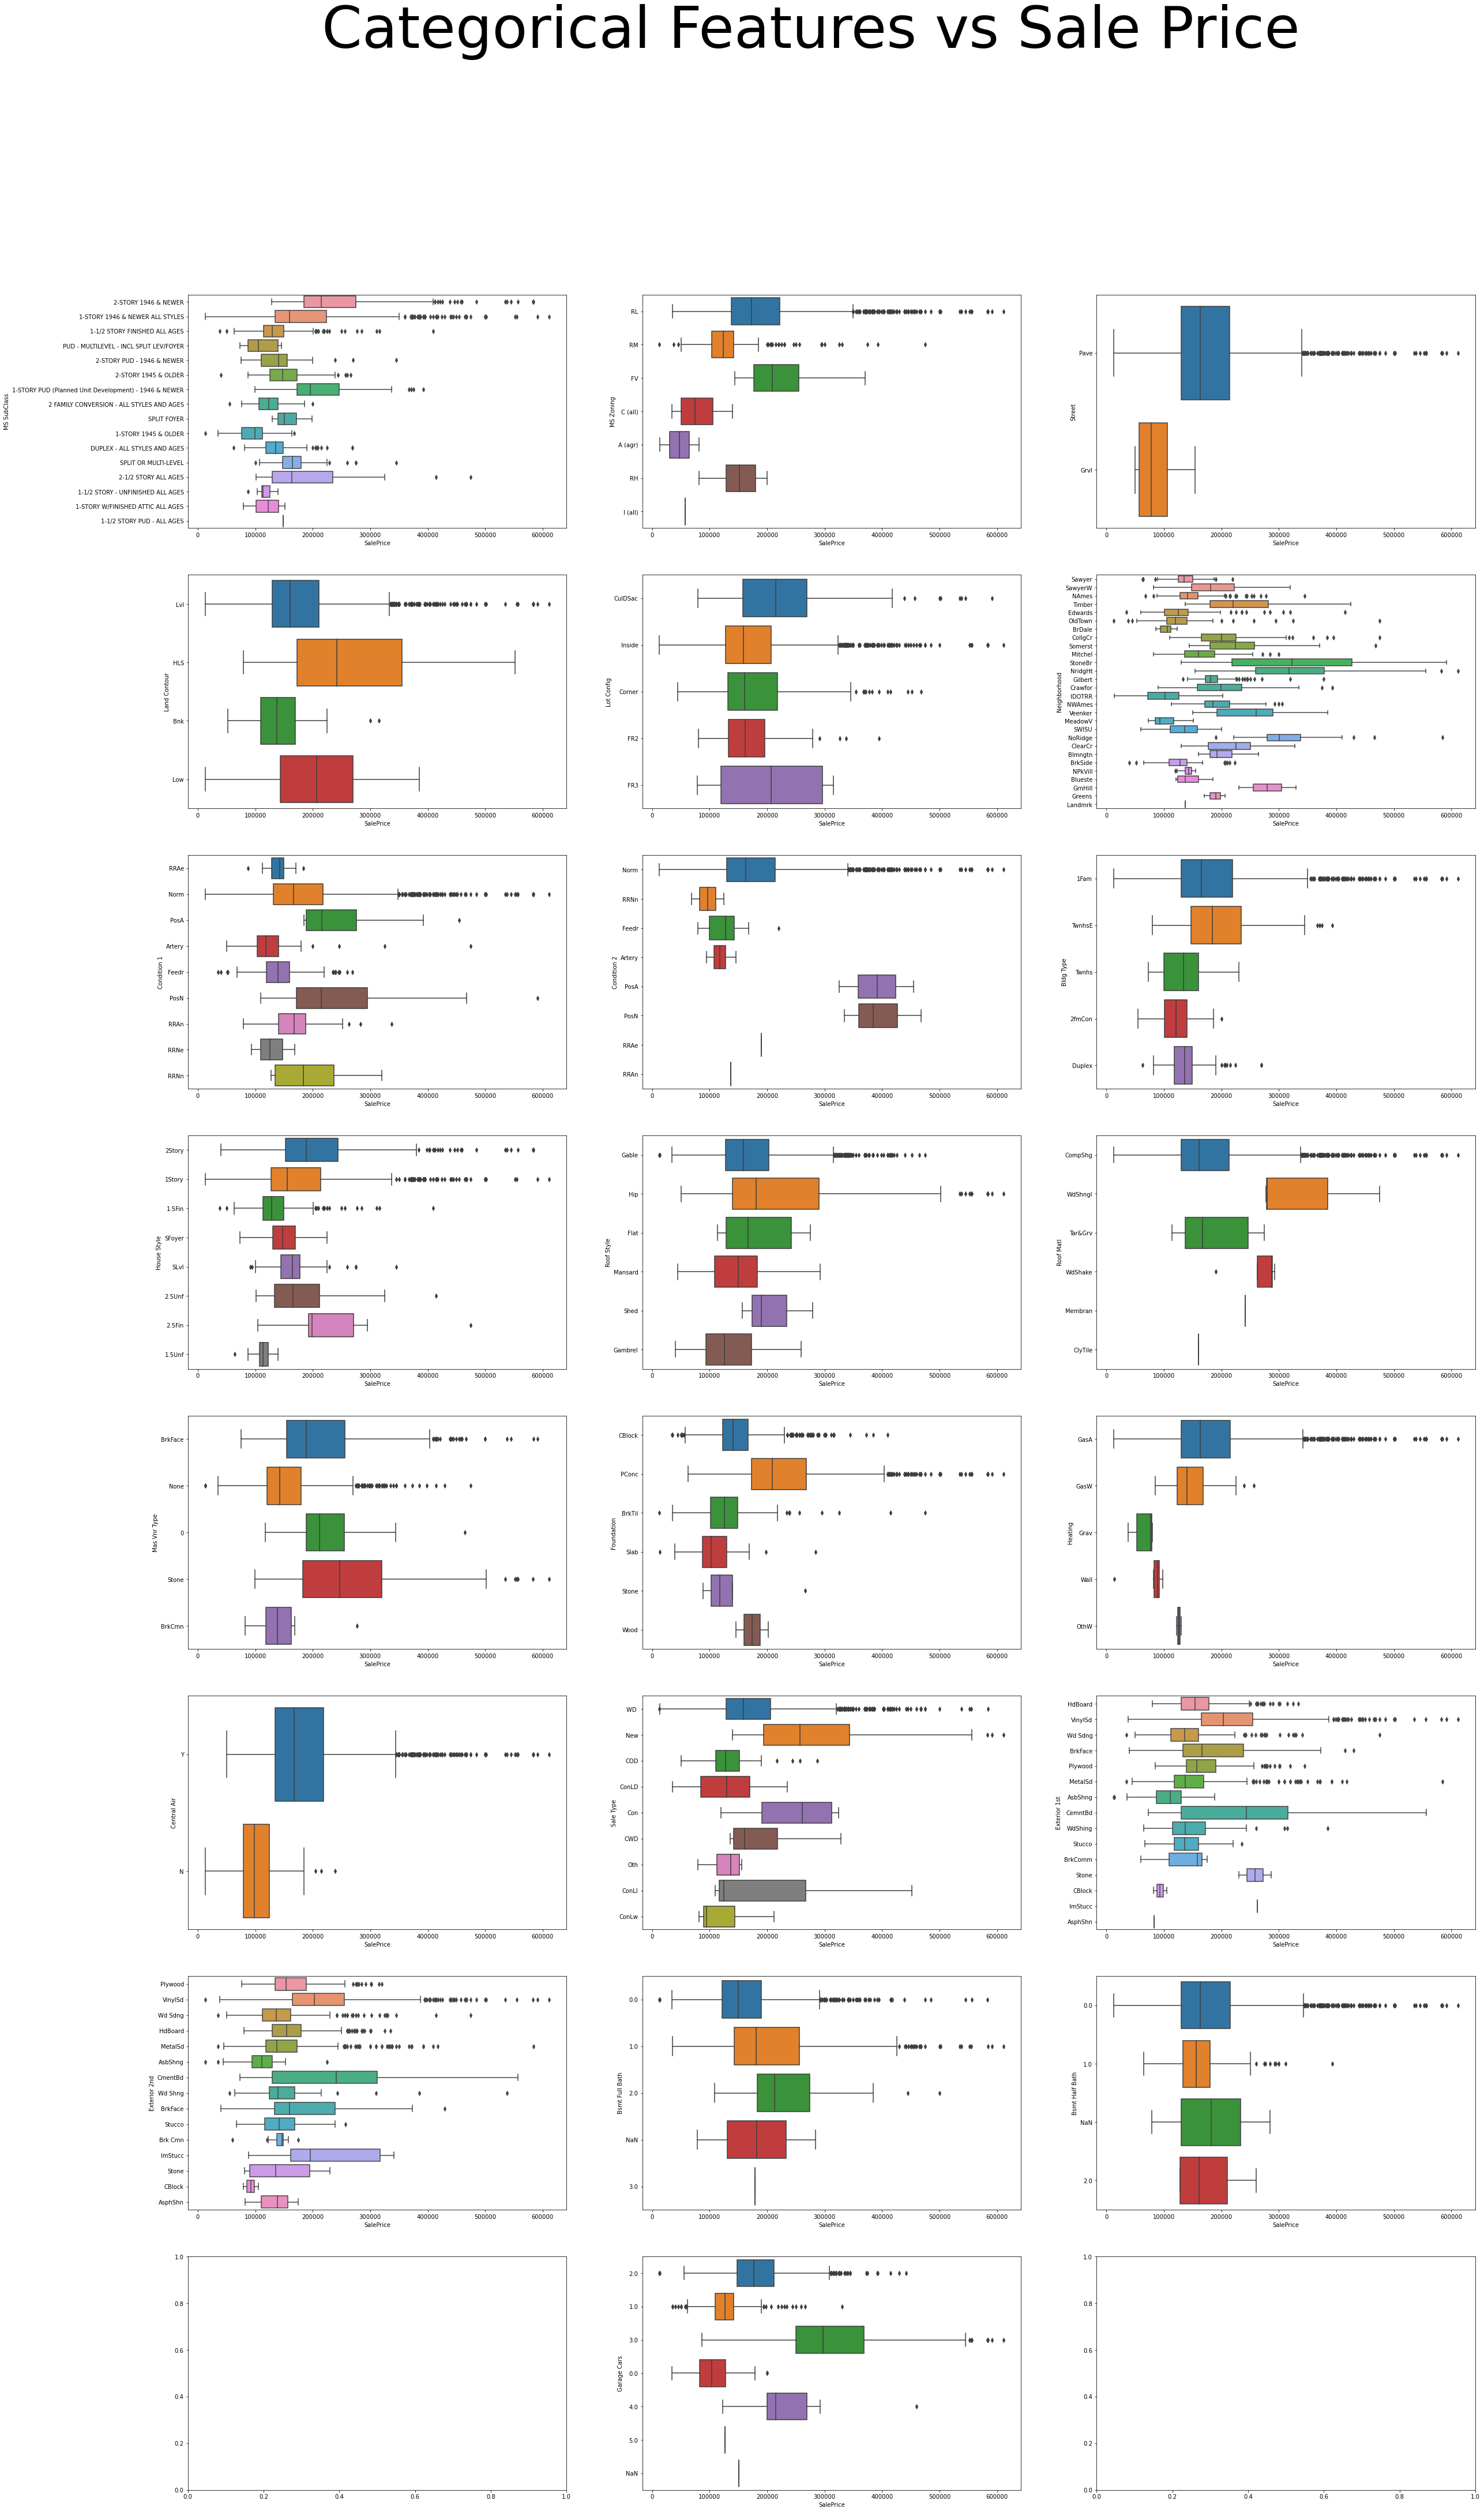

In [33]:
# perform variance analysis on categorical columns before hot encoding to reduce the number of features

fig, axes = plt.subplots(8, 3, figsize=(40, 70))

fig.suptitle('Categorical Features vs Sale Price', fontsize=100)

sns.boxplot(ax=axes[0, 0], data=train_clean, x='SalePrice', y='MS SubClass')
sns.boxplot(ax=axes[0, 1], data=train_clean, x='SalePrice', y='MS Zoning')
sns.boxplot(ax=axes[0, 2], data=train_clean, x='SalePrice', y='Street')

sns.boxplot(ax=axes[1, 0], data=train_clean, x='SalePrice', y='Land Contour')
sns.boxplot(ax=axes[1, 1], data=train_clean, x='SalePrice', y='Lot Config')
sns.boxplot(ax=axes[1, 2], data=train_clean, x='SalePrice', y='Neighborhood')

sns.boxplot(ax=axes[2, 0], data=train_clean, x='SalePrice', y='Condition 1')
sns.boxplot(ax=axes[2, 1], data=train_clean, x='SalePrice', y='Condition 2')
sns.boxplot(ax=axes[2, 2], data=train_clean, x='SalePrice', y='Bldg Type')

sns.boxplot(ax=axes[3, 0], data=train_clean, x='SalePrice', y='House Style')
sns.boxplot(ax=axes[3, 1], data=train_clean, x='SalePrice', y='Roof Style')
sns.boxplot(ax=axes[3, 2], data=train_clean, x='SalePrice', y='Roof Matl')

sns.boxplot(ax=axes[4, 0], data=train_clean, x='SalePrice', y='Mas Vnr Type')
sns.boxplot(ax=axes[4, 1], data=train_clean, x='SalePrice', y='Foundation')
sns.boxplot(ax=axes[4, 2], data=train_clean, x='SalePrice', y='Heating')

sns.boxplot(ax=axes[5, 0], data=train_clean, x='SalePrice', y='Central Air')
sns.boxplot(ax=axes[5, 1], data=train_clean, x='SalePrice', y='Sale Type')
sns.boxplot(ax=axes[5, 2], data=train_clean, x='SalePrice', y='Exterior 1st')

sns.boxplot(ax=axes[6, 0], data=train_clean, x='SalePrice', y='Exterior 2nd')
sns.boxplot(ax=axes[6, 1], data=train_clean, x='SalePrice', y='Bsmt Full Bath')
sns.boxplot(ax=axes[6, 2], data=train_clean, x='SalePrice', y='Bsmt Half Bath')

sns.boxplot(ax=axes[7, 1], data=train_clean, x='SalePrice', y='Garage Cars')
;


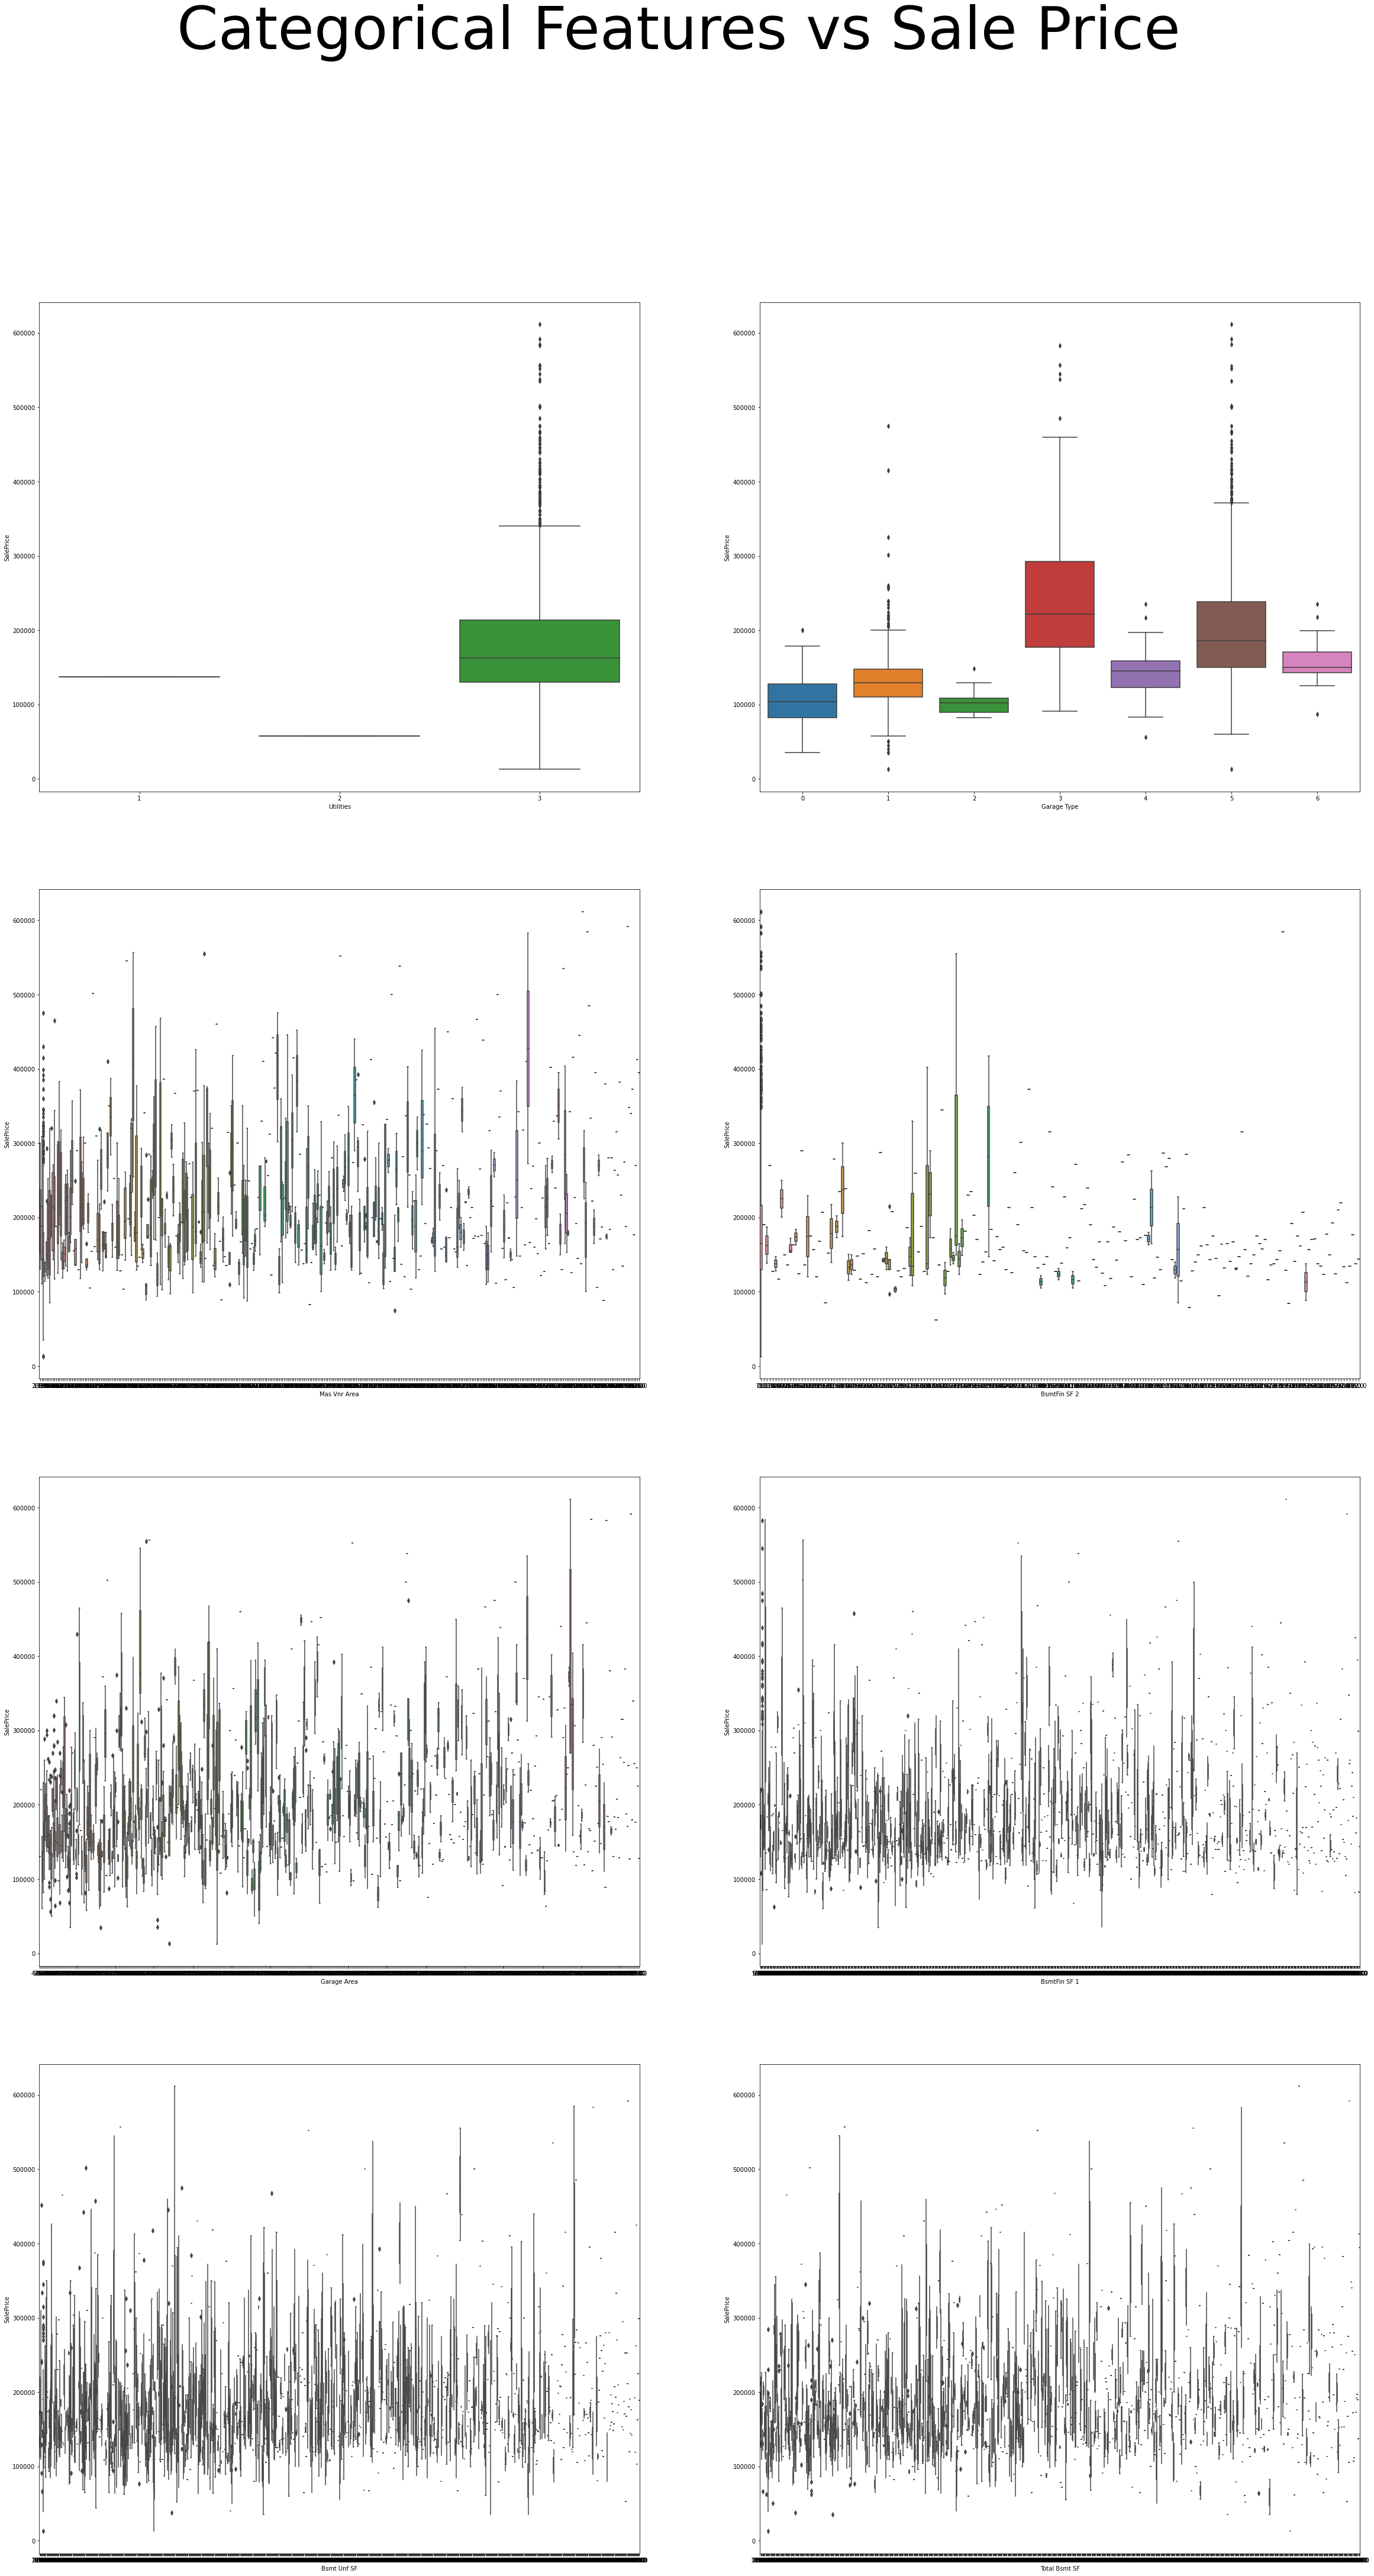

In [34]:
fig, axes = plt.subplots(4, 2, figsize=(40, 70))

fig.suptitle('Categorical Features vs Sale Price', fontsize=100)

sns.boxplot(ax=axes[0, 0], data=train_clean, x='Utilities', y='SalePrice')
sns.boxplot(ax=axes[0, 1], data=train_clean, x='Garage Type', y='SalePrice')

sns.boxplot(ax=axes[1, 0], data=train_clean, x='Mas Vnr Area', y='SalePrice')
sns.boxplot(ax=axes[1, 1], data=train_clean, x='BsmtFin SF 2', y='SalePrice')

sns.boxplot(ax=axes[2, 0], data=train_clean, x='Garage Area', y='SalePrice')
sns.boxplot(ax=axes[2, 1], data=train_clean, x='BsmtFin SF 1', y='SalePrice')

sns.boxplot(ax=axes[3, 0], data=train_clean, x='Bsmt Unf SF', y='SalePrice')
sns.boxplot(ax=axes[3, 1], data=train_clean, x='Total Bsmt SF', y='SalePrice');
# the graph is not clear will do another method to select features

In [35]:
# remove columns with little variance to saleprice
train_clean_1 = train_clean.drop(columns=['Street','Land Contour', 'Utilities', 'Lot Config', 'Roof Style', 'Central Air', 
                                          'Bsmt Half Bath', 'Bsmt Full Bath'])

In [36]:
# let's drop features with variance < 1 if any.
train_clean_1.var()

Id                 7.123037e+05
PID                3.560461e+16
Lot Area           4.546116e+07
Lot Shape          3.209385e-01
Land Slope         5.966489e-02
Overall Qual       2.034248e+00
Overall Cond       1.219914e+00
Year Built         9.107050e+02
Year Remod/Add     4.425238e+02
Exter Qual         1.382795e+00
Exter Cond         5.487317e-01
Bsmt Qual          2.898971e+00
Bsmt Cond          1.004004e+00
Bsmt Exposure      1.165190e+00
BsmtFin Type 1     4.518142e+00
BsmtFin Type 2     9.016860e-01
Heating QC         3.701023e+00
Electrical         1.619874e-01
1st Flr SF         1.571702e+05
2nd Flr SF         1.811958e+05
Low Qual Fin SF    2.608029e+03
Gr Liv Area        2.504480e+05
Full Bath          3.017079e-01
Half Bath          2.510438e-01
Bedroom AbvGr      6.832979e-01
Kitchen AbvGr      4.401184e-02
Kitchen Qual       1.771972e+00
TotRms AbvGrd      2.434302e+00
Functional         4.670474e-01
Fireplaces         4.077031e-01
Fireplace Qu       9.824969e+00
Garage T

In [37]:
# dummify the categorical columns
train_dummified = pd.get_dummies(columns=['MS SubClass', 'MS Zoning', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 
                                 'House Style', 'Roof Matl', 'Mas Vnr Type', 'Foundation', 'Heating', 'Sale Type', 'Alley',
                                 'Garage Type', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Area','BsmtFin SF 2', 'Misc Feature',
                                 'Garage Area', 'BsmtFin SF 1', 'Garage Cars', 'Bsmt Unf SF', 'Total Bsmt SF'],
                                data=train_clean_1, drop_first=True)

In [38]:
# Find the top features with > 0.5 correlation to saleprice
train_dummified_corr = train_dummified.corr()
#Correlation with output variable
cor_target = abs(train_dummified_corr['SalePrice'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5].sort_values(ascending=False)
print(f'Features with more than 0.5 correlation to SalePrice: ')
print('--------------------------')
print(relevant_features)


Features with more than 0.5 correlation to SalePrice: 
--------------------------
SalePrice           1.000000
Overall Qual        0.800207
Exter Qual          0.712146
Gr Liv Area         0.697038
Kitchen Qual        0.692336
Bsmt Qual           0.633102
Garage Cars_3.0     0.619110
1st Flr SF          0.618486
Year Built          0.571849
Garage Finish       0.557839
Year Remod/Add      0.550370
Fireplace Qu        0.541330
Full Bath           0.537969
Foundation_PConc    0.529047
TotRms AbvGrd       0.504014
Name: SalePrice, dtype: float64


In [39]:
# Keep features with more than 0.5 correlation

df = train_dummified[['SalePrice', 'Overall Qual', 'Exter Qual', 'Gr Liv Area',
                      'Kitchen Qual', 'Bsmt Qual', 'Garage Cars_3.0', '1st Flr SF', 
                      'Year Built', 'Garage Finish', 'Year Remod/Add', 'Fireplace Qu',
                      'Full Bath', 'Foundation_PConc', 'TotRms AbvGrd']].copy()
df.head()

,SalePrice,Overall Qual,Exter Qual,Gr Liv Area,Kitchen Qual,Bsmt Qual,Garage Cars_3.0,1st Flr SF,Year Built,Garage Finish,Year Remod/Add,Fireplace Qu,Full Bath,Foundation_PConc,TotRms AbvGrd
0,130500,6,7,1479,7,5.0,0,725,1976,2.0,2005,0,2,0,6
1,220000,7,7,2122,7,7.0,0,913,1996,2.0,1997,5,2,1,8
2,109000,5,5,1057,7,5.0,0,1057,1953,1.0,2007,0,1,0,5
3,174000,5,5,1444,5,7.0,0,744,2006,3.0,2007,0,2,1,7
4,138500,6,5,1445,5,3.0,0,831,1900,1.0,1993,0,2,1,6


# Modelling & Evaluation

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Lasso
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline

In [41]:
df.shape

(2051, 15)

In [42]:
# Define X and y
X = df.drop(columns=['SalePrice']).copy()
y = df['SalePrice']

In [43]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [44]:
# check
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1538, 14) (1538,)
(513, 14) (513,)


In [45]:
#instantiate
mms = MinMaxScaler()

#fit and transform
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

#Linear Regression
lr = LinearRegression(normalize=True)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=np.logspace(0,5,100), scoring='neg_mean_squared_error', cv=5)

# Cross-validate over our list of ridge alphas.
lasso_cv = LassoCV(alphas=np.logspace(-2,0,10), max_iter=10_000, cv=5, random_state=42)

In [75]:
# create function that calls out 3 models and return rmse difference between training and test predicted set
def model(X_train, y_train, X_test, y_test):
    
    # LinearRegression
    print('Linear Regression Model:')
    lr.fit(X_train, y_train)
    
    # Predict on train set
    y_train_pred = lr.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    print(f'RMSE train score: {abs(rmse_train)}')
    
    # Predict on test set
    y_test_pred = lr.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'RMSE test score: {abs(rmse_test)}')
    
    # check for overfitting
    rmse_diff = abs(1-(rmse_train/rmse_test))

    print(f'RMSE difference for predicted set using Linear Regression: {rmse_diff*100}%') # if this is between 1-2%, then no overfitting
    print('----------------------')
    
    # RidgeCV
    print('RidgeCV Model:')
    
    # Fit model using best ridge alpha
    ridge_cv.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = ridge_cv.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    print(f'RMSE train score: {abs(rmse_train)}')    
    
    # Predict on test set
    y_test_pred = ridge_cv.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'RMSE test score: {abs(rmse_test)}')
    
    # check for overfitting
    ridgecv_diff = abs(1-(rmse_train/rmse_test))
    print(f'RMSE difference for predicted set using RidgeCV: {ridgecv_diff * 100}%') # if this is between 1-2%, then no overfitting
    print('----------------------')
    
    # LassoCV
    print('LassoCV Model:')

    # Fit model using best ridge alpha!
    lasso_cv.fit(X_train, y_train)

    # Here is the optimal value of alpha
    lasso_cv.alpha_

    # Predict on training set
    y_train_pred = lasso_cv.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    print(f'RMSE train score: {abs(rmse_train)}')
    
    # Predict on test set
    y_test_pred = lasso_cv.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'RMSE test score: {abs(rmse_test)}')
    
    # check for overfitting
    lassocv_diff = abs(1-(rmse_train/rmse_test))
    print(f'RMSE difference for predicted set using LassoCV: {lassocv_diff * 100}%') # if this is between 1-2%, then no overfitting
    
    

In [76]:
print('Original Features')
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)
print('-----------------')
model(X_train, y_train, X_test, y_test)

Original Features
(1538, 14) (1538,)
(513, 14) (513,)
-----------------
Linear Regression Model:
RMSE train score: 34129.99255625036
RMSE test score: 28454.996919535908
RMSE difference for predicted set using Linear Regression: 19.94375769135388%
----------------------
RidgeCV Model:
RMSE train score: 34197.845018317916
RMSE test score: 29100.180992133304
RMSE difference for predicted set using RidgeCV: 17.517636840687256%
----------------------
LassoCV Model:
RMSE train score: 34130.00174002023
RMSE test score: 28458.59286349287
RMSE difference for predicted set using LassoCV: 19.9286342221183%


In [83]:
# interpret the coefficient by the model with the best score
# RidgeCV has the best score

print(ridge_cv.coef_)
print(X.columns)

# convert into a dataframe
coef = pd.DataFrame(ridge_cv.coef_, X.columns, columns=['Coefficients'])

[ 98409.97353231  45910.79201959 146613.99558465  37079.53243834
  38008.55078877  43021.02969279 112830.56527301  19969.57558424
  13886.86675751   6673.98813438  21102.10194099    169.32537014
  -2762.05224856  26386.89777096]
Index(['Overall Qual', 'Exter Qual', 'Gr Liv Area', 'Kitchen Qual',
       'Bsmt Qual', 'Garage Cars_3.0', '1st Flr SF', 'Year Built',
       'Garage Finish', 'Year Remod/Add', 'Fireplace Qu', 'Full Bath',
       'Foundation_PConc', 'TotRms AbvGrd'],
      dtype='object')


In [85]:
# sort the coefficient values in descending order
coef.sort_values(by='Coefficients', ascending=False)

,Coefficients
Gr Liv Area,146613.995585
1st Flr SF,112830.565273
Overall Qual,98409.973532
Exter Qual,45910.792020
Garage Cars_3.0,43021.029693
Bsmt Qual,38008.550789
Kitchen Qual,37079.532438
TotRms AbvGrd,26386.897771
Fireplace Qu,21102.101941
Year Built,19969.575584


In [ ]:
# 3 Top features that have great affect on the house price are: Gr Liv Area, 1st Flr SF, Overall Qual

# Conclusion & Summary

- The preferred model for predicting is RidgeCV with a scoring difference of 17%. 
- However the model can be improved if given time to do a polynomial to selected features with high correlation with each other.

- In conclusion the top 3 features that have great impact in house prices are:
1. Ground Living Area
2. 1st Floor SquareFeet
3. Overall Quality


(Basically means the bigger the area the higher the price generally.)

- In addition there are features in the house that can be improved that will have a significant increase in the house price such as the Basement Quality and Kitchen Quality.
